In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

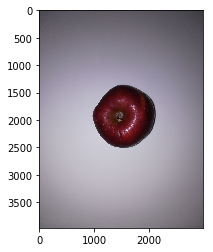

In [22]:
#read image
img = cv2.imread('../images_to_classify/IMG_20181119_225403.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

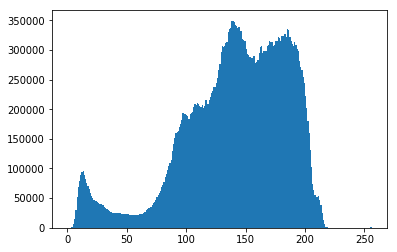

In [23]:
#show histogram to see which treshold we should select
hist = plt.hist(img.ravel(), 256, [0,256])
plt.show(hist)

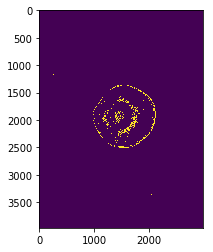

In [24]:
#converting image to graysclae to find threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
thresh = cv2.adaptiveThreshold(gray, 50, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh)

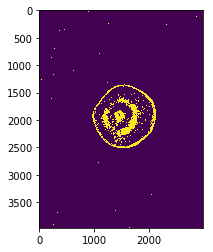

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(thresh, kernel)
plt.imshow(dilated)

In [26]:
_, cnts, _  = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

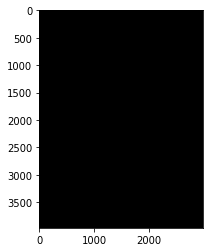

In [27]:
#insert fruit area of original image onto a new image with black background
mask = np.zeros_like(img)
plt.imshow(mask)


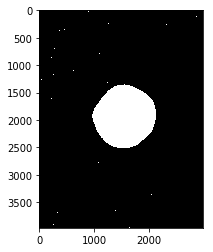

In [28]:
#insert fruit area of original image onto a new image with black background

#creating new black image same size as the original
out = np.zeros_like(img)

#selecting all the pixels from mask that are white and replace them with those same 
#pixels from the original image (that correspond to the pixels of the fruit)
cv2.fillPoly(mask, pts = cnts, color=(255,255,255))

#show the mask we created
plt.imshow(mask)

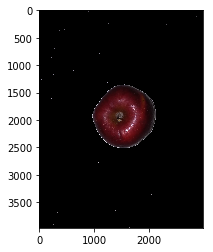

In [29]:
#put back all 3 color dimensions on the mask
img2 = img.copy()
mask[:,:,1] = mask[:,:,0]
mask[:,:,2] = mask[:,:,0]
img2[mask!=255] = 0
plt.imshow(img2)

In [30]:
#get all the rgb values for the mask
r = img2[:,:,0]
g = img2[:,:,1]
b = img2[:,:,2]

In [31]:
#filter all the rgb values for the mask to eliminate the ones that are 0 (black)
r = r[r!=0]
g = g[g!=0]
b = b[b!=0]

In [32]:
#find color by calculating the mean of each color component
[int(r.mean()), int(g.mean()), int(b.mean())]

[75, 28, 33]

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
_, cnts, _  = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts

[array([[[   0,    0]],
 
        [[   0, 3967]],
 
        [[2975, 3967]],
 
        [[2975,    0]]], dtype=int32)]

In [46]:
_, contours, hierarchy = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours



[array([[[   0,    0]],
 
        [[   0, 3967]],
 
        [[2975, 3967]],
 
        [[2975,    0]]], dtype=int32)]

0

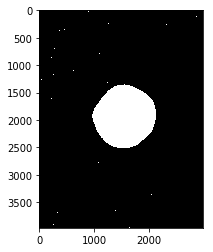

In [35]:
#order all the contours by area from biggest to smallest
boxes.sort(key=lambda x: x[2]*x[3], reverse=True)

#now we want to select the second biggest box (since the biggest one is the contour of the whole image)
minAreaRectangle = boxes[0][1]
minAreaRectangleIndex = boxes[0][0]

#show that this is the contour we want
cv2.drawContours(mask, [minAreaRectangle], 0, (255, 255, 255), 3)
plt.imshow(mask)
minAreaRectangleIndex

In [36]:
x,y,w,h = cv2.boundingRect(cnts[minAreaRectangleIndex])
w,h

(2976, 3968)